In [390]:
# %pip install tensorflow

In [391]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [392]:
data = load_breast_cancer()

In [393]:
X = data.data
y = data.target

In [394]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [395]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [396]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [397]:
from sklearn.utils import class_weight

# Получение весов классов
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([1.33823529, 0.79824561])

In [398]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0], 1:class_weights[1]})

Epoch 1/20


c:\Users\olyao\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.7343 - loss: 0.6201 - val_accuracy: 0.8333 - val_loss: 0.5578
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8761 - loss: 0.5076 - val_accuracy: 0.8684 - val_loss: 0.4770
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8961 - loss: 0.4261 - val_accuracy: 0.8772 - val_loss: 0.4125
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9267 - loss: 0.3611 - val_accuracy: 0.8860 - val_loss: 0.3582
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9259 - loss: 0.3126 - val_accuracy: 0.8947 - val_loss: 0.3132
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9425 - loss: 0.2686 - val_accuracy: 0.9035 - val_loss: 0.2762
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9617 - loss: 0.2251 - val_accuracy: 0.9123 - val_loss: 0.2460
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9686 - loss: 0.1972 - val_accuracy: 0.9298 - val_loss: 0.2216
Epoch 9/20

In [399]:
# Получение значений лосса и валидационного лосса из истории
def check_metrics(history, figure_name):

    train = history.history[f'{figure_name}']
    val = history.history[f'val_{figure_name}']

    # Построение графика лосса и валидационного лосса
    epochs = range(1, len(train) + 1)
    plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')
    plt.plot(epochs, val, 'b', label=f'Validation {figure_name}')
    plt.title(f'Training and Validation {figure_name}')
    plt.xlabel('Epochs')
    plt.ylabel(f'{figure_name}')
    plt.legend()
    plt.show()

C:\Users\olyao\AppData\Local\Temp\ipykernel_68\1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


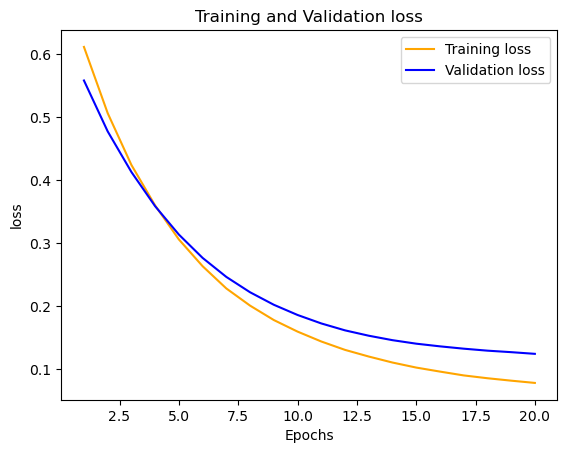

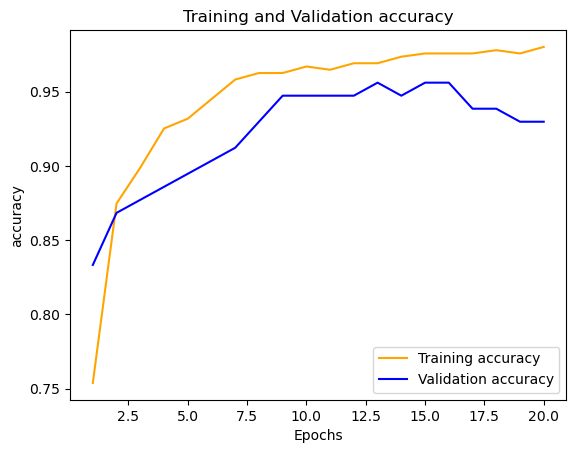

In [400]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

In [401]:
from keras.layers import Dense, BatchNormalization, Dropout

In [402]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [403]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]})

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.3295 - loss: 1.1551 - val_accuracy: 0.6667 - val_loss: 0.6628
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5904 - loss: 0.6552 - val_accuracy: 0.7895 - val_loss: 0.5894
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8349 - loss: 0.3684 - val_accuracy: 0.8421 - val_loss: 0.5319
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8992 - loss: 0.2587 - val_accuracy: 0.8509 - val_loss: 0.4876
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9118 - loss: 0.2012 - val_accuracy: 0.8684 - val_loss: 0.4531
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9311 - loss: 0.1673 - val_accuracy: 0.8947 - val_loss: 0.4254
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9481 - loss: 0.1425 - val_accuracy: 0.8947 - val_loss: 0.4025
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9455 - loss: 0.1331 - val_accuracy: 0.9123 - val_loss: 0.3832

C:\Users\olyao\AppData\Local\Temp\ipykernel_68\1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


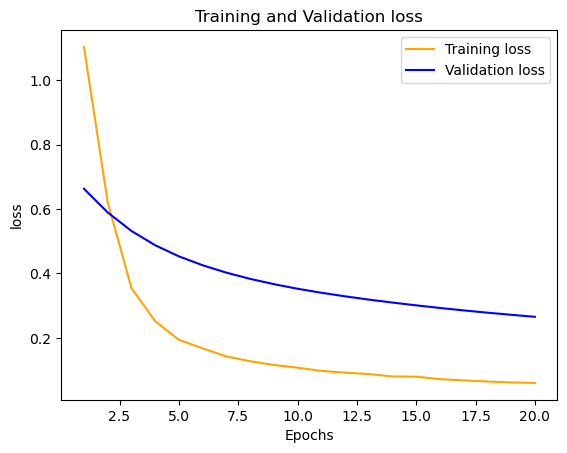

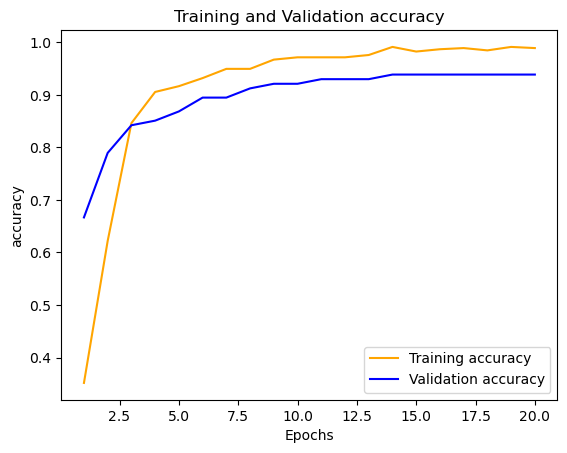

In [404]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

In [405]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [406]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]})

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.5325 - loss: 0.7972 - val_accuracy: 0.7982 - val_loss: 0.5544
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8056 - loss: 0.4252 - val_accuracy: 0.8860 - val_loss: 0.4782
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9015 - loss: 0.2799 - val_accuracy: 0.8947 - val_loss: 0.4220
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9422 - loss: 0.2032 - val_accuracy: 0.9298 - val_loss: 0.3798
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9466 - loss: 0.1594 - val_accuracy: 0.9298 - val_loss: 0.3471
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9536 - loss: 0.1415 - val_accuracy: 0.9298 - val_loss: 0.3212
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9512 - loss: 0.1328 - val_accuracy: 0.9211 - val_loss: 0.3000
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9523 - loss: 0.1190 - val_accuracy: 0.9211 - val_loss: 0.2827

C:\Users\olyao\AppData\Local\Temp\ipykernel_68\1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


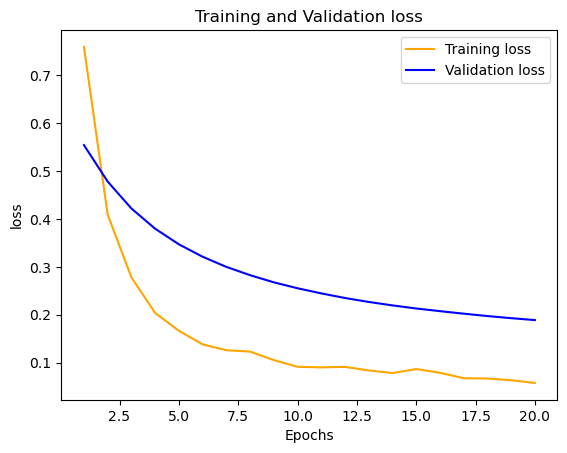

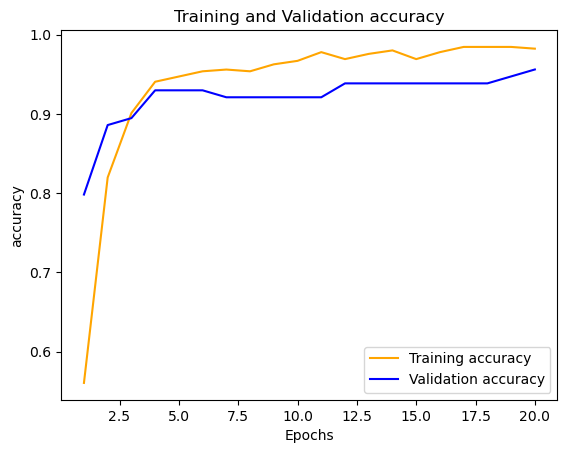

In [407]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

In [408]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [409]:
model.predict(X_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[8.9141792e-03],
       [9.5454651e-01],
       [1.4745420e-01],
       [5.0076365e-01],
       [3.3730741e-03],
       [8.5755682e-01],
       [9.4139630e-01],
       [1.5781917e-02],
       [5.0179869e-02],
       [1.8127130e-04],
       [8.9599365e-01],
       [8.0650285e-02],
       [9.1940516e-01],
       [6.3403904e-02],
       [1.3278198e-01],
       [6.5830415e-01],
       [4.8927945e-01],
       [5.0432169e-01],
       [9.5198071e-01],
       [8.9896381e-01],
       [8.1772693e-02],
       [2.7201882e-01],
       [9.5857847e-01],
       [8.1962121e-01],
       [8.7488556e-01],
       [7.0714092e-01],
       [5.2118730e-03],
       [8.3953494e-01],
       [8.5160661e-01],
       [9.1763461e-01],
       [8.3250111e-01],
       [9.2161644e-01],
       [8.3066779e-01],
       [6.7225981e-01],
       [4.7200944e-02],
       [3.4688732e-01],
       [8.8968080e-01],
       [6.8758994e-01],
       [5.7086724e-01],
       [4.2462081e-02],
       [9.4118822e-01],
       [9.433744

In [410]:
treshold = 0.5
y_pred = [1 if i > treshold else 0 for i in model.predict(X_val)]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [411]:
print(classification_report(y_val, np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.97      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [412]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [413]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [414]:
model = create_model()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
save_best_weights = ModelCheckpoint(filepath='./model_checkpoint.weights.h5',
                                    save_weights_only=True,
                                    monitor='val_accuracy',
                                    mode='max',
                                    save_best_only=True)

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=10,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]},
           callbacks=[early_stopping,save_best_weights])

Epoch 1/10


c:\Users\olyao\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.4560 - loss: 0.6430 - val_accuracy: 0.6491 - val_loss: 0.5930
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7215 - loss: 0.5280 - val_accuracy: 0.8333 - val_loss: 0.4952
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9023 - loss: 0.4307 - val_accuracy: 0.8860 - val_loss: 0.4165
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9269 - loss: 0.3626 - val_accuracy: 0.9035 - val_loss: 0.3524
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9481 - loss: 0.3016 - val_accuracy: 0.9211 - val_loss: 0.3005
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9536 - loss: 0.2567 - val_accuracy: 0.9474 - val_loss: 0.2585
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9617 - loss: 0.2237 - val_accuracy: 0.9561 - val_loss: 0.2251
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9526 - loss: 0.2027 - val_accuracy: 0.9561 - val_loss: 0.1989
Epoch 9/10

In [415]:
model.load_weights("./model_checkpoint.weights.h5")

In [416]:
treshold = 0.5
y_pred = [1 if i > treshold else 0 for i in model.predict(X_val)]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [417]:
from sklearn.metrics import accuracy_score

In [418]:
accuracy_score(y_val, y_pred)

0.956140350877193